<a href="https://colab.research.google.com/github/muhammed-oztel/CSE4088_ML_Term_Project/blob/main/project_figured.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



In [7]:
data = load_breast_cancer()
X, y = data.data, data.target
sc = StandardScaler()
data_std = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(data_std, y, test_size = 0.3, random_state=0)


scores = []


In [8]:
import warnings
warnings.simplefilter('ignore')

In [9]:
def display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm_display

    

In [68]:
def display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    return cm_display


# Perceptron Learning Algorithm

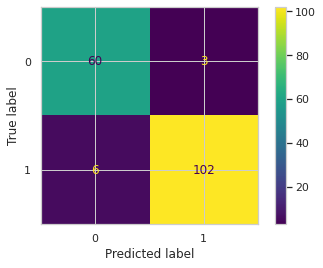

In [61]:
perceptron_classifier = Perceptron()
perceptron_score = round(np.mean(cross_val_score(perceptron_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(perceptron_score)

perceptron_classifier.fit(X_train, y_train)
perceptron_classifier.score(X, y)
y_pred = perceptron_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)


# Logistic Regressieon


linelinear_reg_score

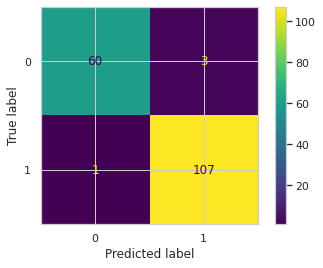

In [62]:
log_reg_classifier = LogisticRegression()
log_reg_score = round(np.mean(cross_val_score(log_reg_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(log_reg_score)
log_reg_score

log_reg_classifier.fit(X_train, y_train)
log_reg_classifier.score(X, y)
y_pred = log_reg_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)

# SVM - Neural Network

<h3>Linear Kernel</h3k

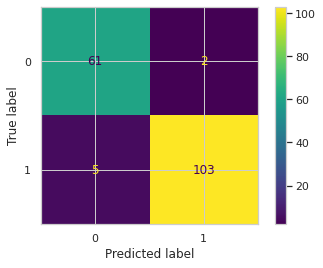

In [63]:
rbf_svm_classifier = SVC(kernel = 'linear', random_state = 0)
rbf_svm_score = round(np.mean(cross_val_score(rbf_svm_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(rbf_svm_score)


rbf_svm_classifier.fit(X_train, y_train)
rbf_svm_classifier.score(X, y)
y_pred = rbf_svm_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)

<h3>RBF Kernel</h3>



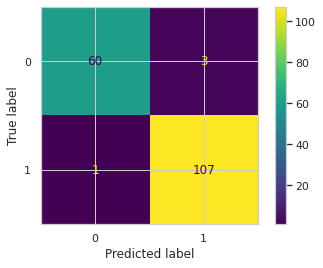

In [64]:
rbf_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
rbf_svm_score = round(np.mean(cross_val_score(rbf_svm_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(rbf_svm_score)

rbf_svm_classifier.fit(X_train, y_train)
rbf_svm_classifier.score(X, y)
y_pred = rbf_svm_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)


# Decision Tree Classification




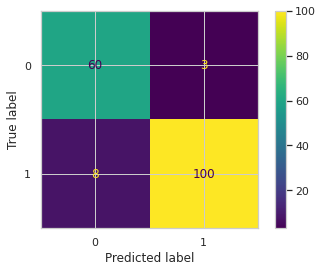

In [65]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_score = round(np.mean(cross_val_score(dt_classifier, data_std, y=y, scoring='f1_micro', cv=10))*100,2)
scores.append(dt_score)

dt_classifier.fit(X_train, y_train)
dt_classifier.score(X, y)
y_pred = dt_classifier.predict(X_test)
cm = display_cm(y_test, y_pred)

# classifier.fit(X_train, Y_train)

In [66]:
scores

[96.12, 98.07, 97.54, 97.71, 93.85]

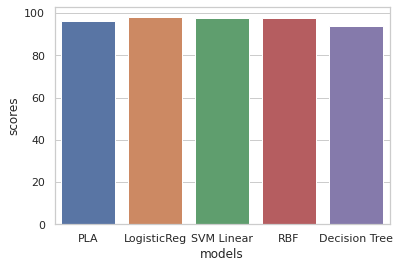

In [67]:
models = [ "PLA", "LogisticReg", "SVM Linear", "RBF", "Decision Tree"]
sns.set_theme(style="whitegrid")
df = pd.DataFrame({'models': models, 'scores': scores})
ax = sns.barplot(x="models", y="scores", data=df)

In [5]:

dataset = pd.read_csv("data.csv")
X = dataset.iloc[:, 2:31].values
Y = dataset.iloc[:, 31].values
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
print("Cancer data set dimensions : {}".format(dataset.shape))
dataset.isnull().sum()
dataset.isna().sum()


Cancer data set dimensions : (569, 33)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
df = pd.read_csv("data.csv")
df = df.drop(['Unnamed: 32', 'id'], axis=1)

#encoding the the target feature
df['diagnosis']= df['diagnosis'].replace('M', 1)
df['diagnosis']= df['diagnosis'].replace('B', 0)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


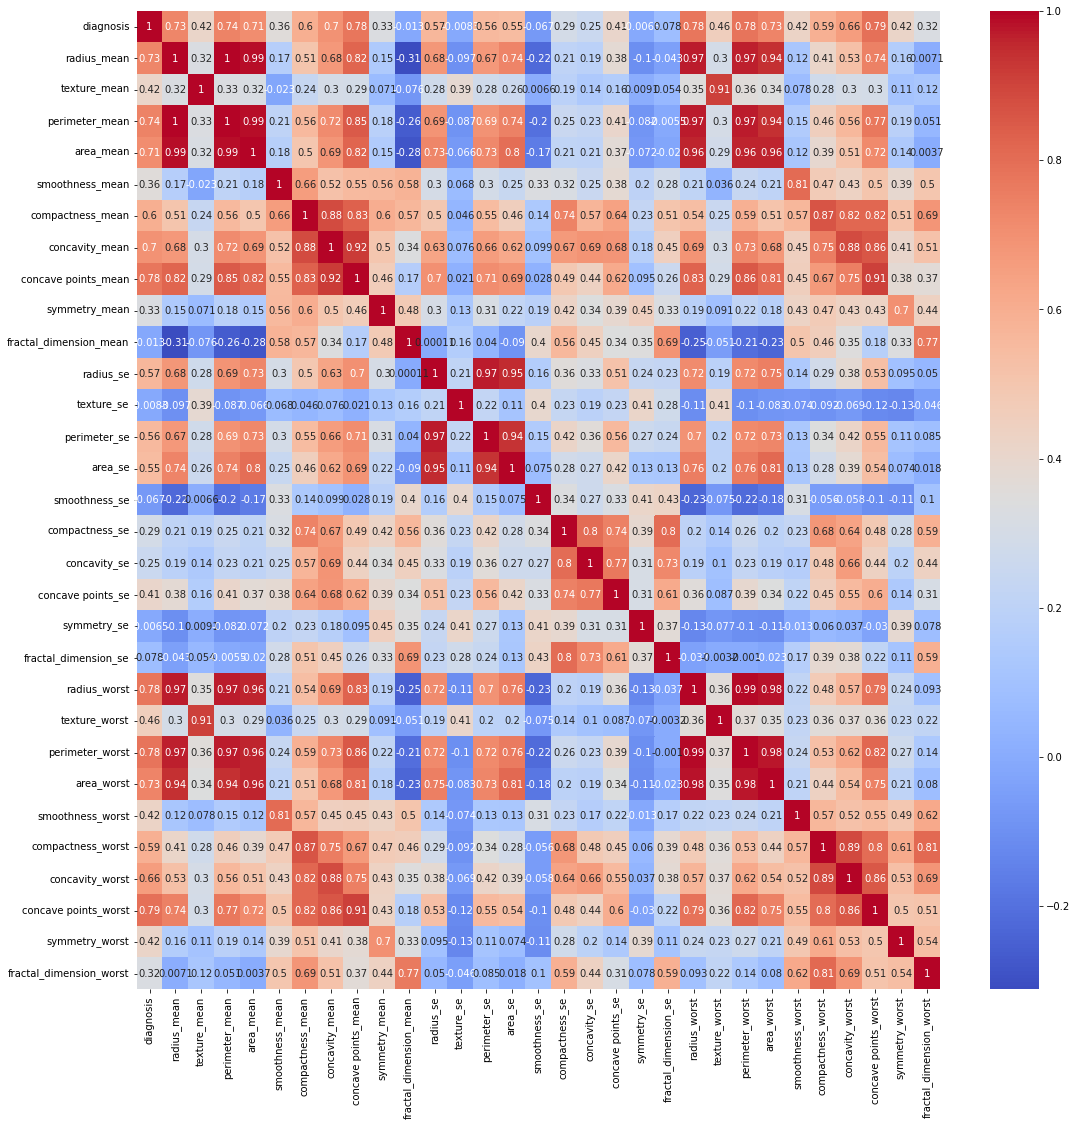

In [9]:

corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()



In [10]:
#finding out the positively corelated feature
cc=corr[abs(corr['diagnosis']) > 0.5].index
print('- Number of most correlated features = ', len(cc))
print('--------------------------------------------------')
print('- Most correlated features is: \n ',cc)

- Number of most correlated features =  16
--------------------------------------------------
- Most correlated features is: 
  Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [11]:
#finding out the negatively corelated feature
cc2=corr[abs(corr['diagnosis']) <= 0.5].index
print('- Number of Least correlated features = ', len(cc2))
print('--------------------------------------------------')
print('- Least correlated features is: \n ',cc2)

- Number of Least correlated features =  15
--------------------------------------------------
- Least correlated features is: 
  Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [24]:
df = df[['diagnosis', 'radius_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst','texture_mean', 
         'smoothness_mean', 'symmetry_mean','area_se','fractal_dimension_se',
         'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst']]

df.head()

,diagnosis,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,texture_mean,smoothness_mean,symmetry_mean,area_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,1001.0,0.27760,0.3001,0.14710,184.60,2019.0,0.6656,0.7119,0.2654,10.38,0.11840,0.2419,153.40,0.006193,17.33,0.1622,0.4601,0.11890
1,1,20.57,1326.0,0.07864,0.0869,0.07017,158.80,1956.0,0.1866,0.2416,0.1860,17.77,0.08474,0.1812,74.08,0.003532,23.41,0.1238,0.2750,0.08902
2,1,19.69,1203.0,0.15990,0.1974,0.12790,152.50,1709.0,0.4245,0.4504,0.2430,21.25,0.10960,0.2069,94.03,0.004571,25.53,0.1444,0.3613,0.08758
3,1,11.42,386.1,0.28390,0.2414,0.10520,98.87,567.7,0.8663,0.6869,0.2575,20.38,0.14250,0.2597,27.23,0.009208,26.50,0.2098,0.6638,0.17300
4,1,20.29,1297.0,0.13280,0.1980,0.10430,152.20,1575.0,0.2050,0.4000,0.1625,14.34,0.10030,0.1809,94.44,0.005115,16.67,0.1374,0.2364,0.07678


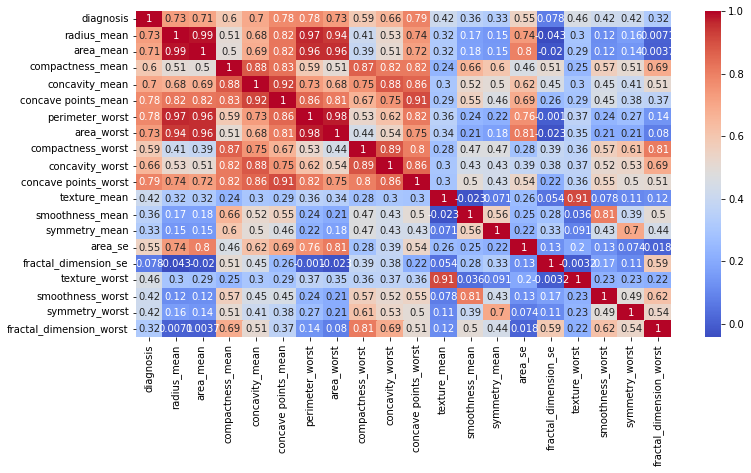

In [25]:
#plotting the corellation matrix
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [27]:
#dividing the dataframe into training and target features
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
#splitting the dataframe and keeping 80% of the data for training and rest 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
print(df.shape)
df.tail(10)



(569, 20)


,diagnosis,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,texture_mean,smoothness_mean,symmetry_mean,area_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
559,0,11.51,403.5,0.10210,0.11120,0.04105,82.28,474.2,0.25170,0.3630,0.09653,23.93,0.09261,0.1388,16.97,0.004738,37.16,0.12980,0.2112,0.08732
560,0,14.05,600.4,0.11260,0.04462,0.04304,100.20,706.7,0.22640,0.1326,0.10480,27.15,0.09929,0.1537,29.84,0.005304,33.17,0.12410,0.2250,0.08321
561,0,11.20,386.0,0.03558,0.00000,0.00000,75.19,439.6,0.05494,0.0000,0.00000,29.37,0.07449,0.1060,22.81,0.001773,38.30,0.09267,0.1566,0.05905
562,1,15.22,716.9,0.20870,0.25500,0.09429,128.70,915.0,0.79170,1.1700,0.23560,30.62,0.10480,0.2128,22.65,0.006142,42.79,0.14170,0.4089,0.14090
563,1,20.92,1347.0,0.22360,0.31740,0.14740,179.10,1819.0,0.41860,0.6599,0.25420,25.09,0.10990,0.2149,118.80,0.006213,29.41,0.14070,0.2929,0.09873
564,1,21.56,1479.0,0.11590,0.24390,0.13890,166.10,2027.0,0.21130,0.4107,0.22160,22.39,0.11100,0.1726,158.70,0.004239,26.40,0.14100,0.2060,0.07115
565,1,20.13,1261.0,0.10340,0.14400,0.09791,155.00,1731.0,0.19220,0.3215,0.16280,28.25,0.09780,0.1752,99.04,0.002498,38.25,0.11660,0.2572,0.06637
566,1,16.60,858.1,0.10230,0.09251,0.05302,126.70,1124.0,0.30940,0.3403,0.14180,28.08,0.08455,0.1590,48.55,0.003892,34.12,0.11390,0.2218,0.07820
567,1,20.60,1265.0,0.27700,0.35140,0.15200,184.60,1821.0,0.86810,0.9387,0.26500,29.33,0.11780,0.2397,86.22,0.006185,39.42,0.16500,0.4087,0.12400
568,0,7.76,181.0,0.04362,0.00000,0.00000,59.16,268.6,0.06444,0.0000,0.00000,24.54,0.05263,0.1587,19.15,0.002783,30.37,0.08996,0.2871,0.07039


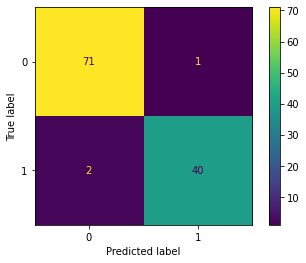

In [23]:
# log reg 
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)
y_pred = classifier_lr.predict(x_test)
cm = display_cm(y_test, y_pred)